In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("C:\\Users\\Sarrang\\p2p\\treated.csv")

In [29]:
df.shape

(176563, 88)

In [7]:

df.columns.get_loc('Rating')

41

In [8]:
# Assuming df is your DataFrame
# You want to exclude columns 38 and 41

# Get all column indices
all_columns = list(range(df.shape[1]))

# Exclude columns 38 and 41 which are probability of default and rating
exclude_columns = [38, 41]
included_columns = [col_idx for col_idx in all_columns if col_idx not in exclude_columns]

# Select columns using iloc
# X= df.iloc[:, included_columns].values
X= df.iloc[:, included_columns]
df_idx=df.iloc[:, included_columns]

### experimenting with rating as dependent variable 

In [9]:
# y=df.iloc[:,38].values
y=df.iloc[:,41]

In [10]:
 # excluded 'ProbabilityOfDefault'
numerical=['BidsManual',
 'AppliedAmount',
 'Amount',
 'Interest',
 'MonthlyPayment',
 'OccupationArea',
 'HomeOwnershipType',
 'IncomeFromPrincipalEmployer',
 'IncomeFromPension',
 'IncomeFromFamilyAllowance',
 'IncomeFromSocialWelfare',
 'IncomeFromLeavePay',
 'IncomeFromChildSupport',
 'IncomeOther',
 'IncomeTotal',
 'LiabilitiesTotal',
 'DebtToIncome',
 'FreeCash',
 'LossGivenDefault',
 'ExpectedReturn',
 'PrincipalOverdueBySchedule',
 'PrincipalPaymentsMade',
 'InterestAndPenaltyPaymentsMade',
 'PrincipalBalance',
 'InterestAndPenaltyBalance',
 'NoOfPreviousLoansBeforeLoan',
 'AmountOfPreviousLoansBeforeLoan',
 'PreviousEarlyRepaymentsCountBeforeLoan',
 'ApplicationSignedHour',
 'ApplicationSignedWeekday',
 'LanguageCode',
 'Age',
 'LoanDuration',
 'UseOfLoan',
 'ExistingLiabilities',
 'RefinanceLiabilities',
 'MonthlyPaymentDay',
 'CreditScoreEsMicroL',
 'LoanWaitTime',
 'PaymentToLoanDateDiff',
 'LoanTerm']

In [11]:
nloc = []

for feature in numerical:
    try:
        idx = X.columns.get_loc(feature)
        nloc.append(idx)
    except ValueError:
        print(f"Column '{feature}' not found in X columns.")


In [12]:
X=X.values
y=y.values

## Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [14]:
from sklearn.preprocessing import PowerTransformer

# Initialize PowerTransformer
power_transformer = PowerTransformer()

# Fit the transformer on training data and transform training data
X_train[:, nloc] = power_transformer.fit_transform(X_train[:, nloc])

# Transform testing data using the fitted transformer from training data
X_test[:, nloc] = power_transformer.transform(X_test[:, nloc])


In [12]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from lightgbm import LGBMClassifier

# Define the hyperparameter search space
param_space = {
    'num_leaves': Integer(20, 50),
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.001, 0.1, 'log-uniform'),
    'n_estimators': Integer(50, 200),
    'min_child_samples': Integer(5, 20),
    'subsample': Real(0.5, 1.0, 'uniform'),
    'colsample_bytree': Real(0.5, 1.0, 'uniform'),
    'reg_alpha': Real(0.0, 1.0, 'uniform'),
    'reg_lambda': Real(0.0, 1.0, 'uniform')
}

# Instantiate LGBMClassifier
lgbm_clf = LGBMClassifier()

# Instantiate BayesSearchCV with Hyperband optimization
opt = BayesSearchCV(
    lgbm_clf,
    search_spaces=param_space,
    scoring='accuracy',  # Change the scoring metric to suit classification
    cv=3,
    n_iter=100,  # Number of hyperparameter configurations to try
    n_jobs=-1,
    optimizer_kwargs={'base_estimator': 'RF', 'n_initial_points': 10}
)

# Perform hyperparameter tuning
opt.fit(X_train, y_train)

# Get best parameters and best model
best_params = opt.best_params_
best_model = opt.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5394
[LightGBM] [Info] Number of data points in the train set: 123594, number of used features: 86
[LightGBM] [Info] Start training from score -3.152887
[LightGBM] [Info] Start training from score -3.287040
[LightGBM] [Info] Start training from score -2.057689
[LightGBM] [Info] Start training from score -1.784697
[LightGBM] [Info] Start training from score -1.562219
[LightGBM] [Info] Start training from score -1.677906
[LightGBM] [Info] Start training from score -1.939378
[LightGBM] [Info] Start training from score -2.475966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [16]:
from lightgbm import LGBMClassifiersifier
lgc=LGBMClassifier(colsample_bytree=0.6142700250065638,
               learning_rate=0.09508495966850976, max_depth=7,
               min_child_samples=7, n_estimators=193, num_leaves=30,
               reg_alpha=0.6244710060826602, reg_lambda=0.8948629806624643,
               subsample=0.9609173383789583)
lgc.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.231888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5394
[LightGBM] [Info] Number of data points in the train set: 123594, number of used features: 86
[LightGBM] [Info] Start training from score -3.152887
[LightGBM] [Info] Start training from score -3.287040
[LightGBM] [Info] Start training from score -2.057689
[LightGBM] [Info] Start training from score -1.784697
[LightGBM] [Info] Start training from score -1.562219
[LightGBM] [Info] Start training from score -1.677906
[LightGBM] [Info] Start training from score -1.939378
[LightGBM] [Info] Start training from score -2.475966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

LGBMClassifier(colsample_bytree=0.6142700250065638,
               learning_rate=0.09508495966850976, max_depth=7,
               min_child_samples=7, n_estimators=193, num_leaves=30,
               reg_alpha=0.6244710060826602, reg_lambda=0.8948629806624643,
               subsample=0.9609173383789583)

In [30]:
y_pred=lgc.predict(X_test)

In [31]:
# Compute feature importances
feature_importances = lgc.feature_importances_

# Create a dictionary to store feature importances
feature_importance_dict = {}

# Loop through feature names and importances and store them in the dictionary
for feature_name, importance in zip(df_idx.columns, feature_importances):
    feature_importance_dict[feature_name] = importance

# Sort the feature importance dictionary by importance values in descending order
sorted_feature_importance_dict = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

In [32]:
sorted_feature_importance_dict

{'ExpectedReturn': 6679,
 'Interest': 6361,
 'LossGivenDefault': 3068,
 'LoanTerm': 2578,
 'BidsManual': 1745,
 'Age': 1375,
 'MonthlyPayment': 1336,
 'InterestAndPenaltyPaymentsMade': 1325,
 'ModelVersion': 1192,
 'PrincipalPaymentsMade': 1097,
 'PaymentToLoanDateDiff': 1071,
 'AmountOfPreviousLoansBeforeLoan': 1063,
 'LiabilitiesTotal': 1052,
 'IncomeTotal': 1036,
 'AppliedAmount': 842,
 'LoanDuration': 784,
 'Amount': 721,
 'PrincipalBalance': 677,
 'ApplicationSignedHour': 657,
 'VerificationType': 648,
 'MonthlyPaymentDay': 570,
 'ExistingLiabilities': 540,
 'InterestAndPenaltyBalance': 539,
 'Country': 518,
 'LanguageCode': 511,
 'NoOfPreviousLoansBeforeLoan': 477,
 'DebtToIncome': 379,
 'Education': 363,
 'FreeCash': 353,
 'HomeOwnershipType': 346,
 'NewCreditCustomer': 337,
 'PrincipalOverdueBySchedule': 337,
 'ApplicationSignedWeekday': 326,
 'IncomeFromPrincipalEmployer': 311,
 'EmploymentDurationCurrentEmployer': 254,
 'Rating_V2_indicator': 234,
 'Gender': 219,
 'CreditScor

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2247
           1       0.95      0.94      0.95      1970
           2       0.95      0.95      0.95      6810
           3       0.94      0.94      0.94      9067
           4       0.95      0.94      0.94     10994
           5       0.96      0.96      0.96      9956
           6       0.97      0.98      0.97      7515
           7       0.98      0.99      0.99      4410

    accuracy                           0.95     52969
   macro avg       0.95      0.95      0.95     52969
weighted avg       0.95      0.95      0.95     52969



In [16]:
from joblib import dump
dump(lgc,'p2p_lgb_cls')

['p2p_lgb_cls']

In [19]:
import shap

In [20]:
explainer = shap.Explainer(lgc, feature_names=df_idx.columns)

In [21]:
shap_values = explainer.shap_values(X_test)

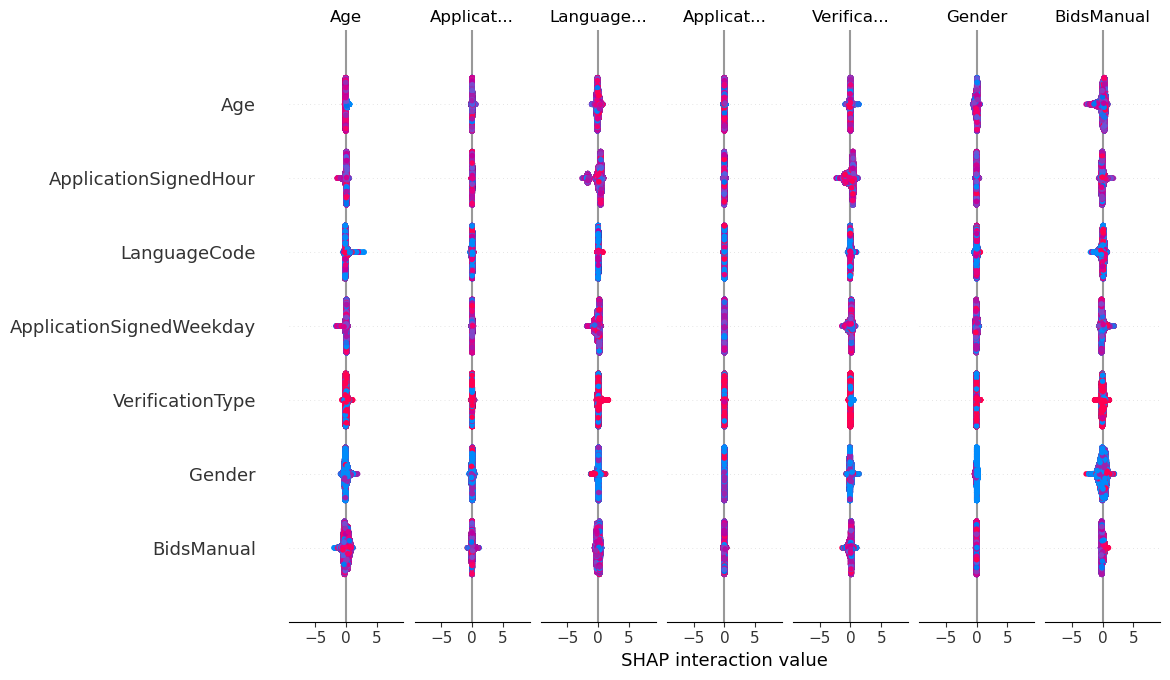

In [22]:
shap.summary_plot(shap_values, X_test, feature_names=df_idx.columns)

In [25]:
import lime
import lime.lime_tabular

In [26]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode="classification", feature_names=df_idx.columns, class_names=["Prediction"])

In [27]:
instance_idx = 0  # Index of the instance to explain
explanation = explainer.explain_instance(X_test[instance_idx], lgc.predict_proba, num_features=len(df_idx.columns))

In [28]:
explanation.show_in_notebook(show_table=True)

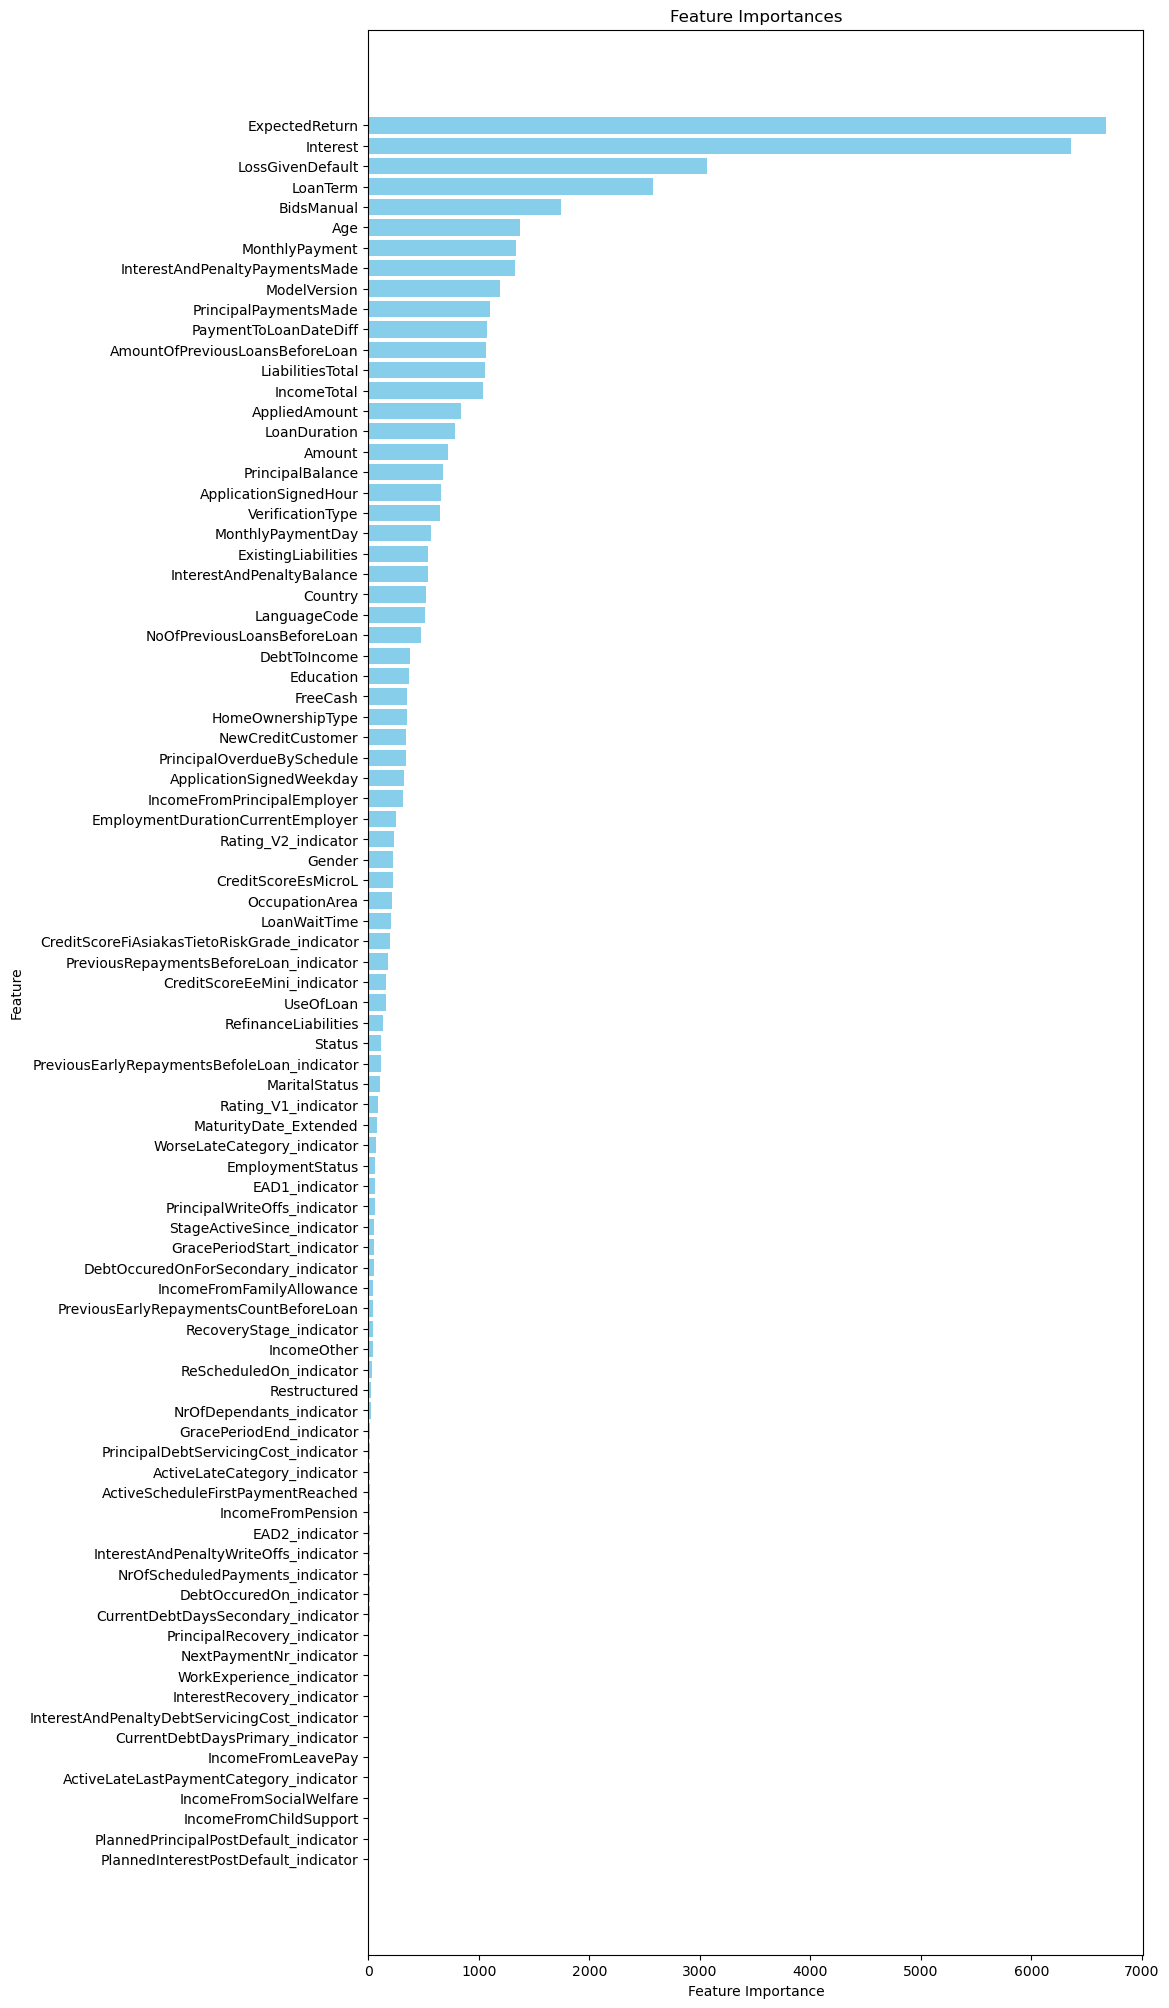

In [24]:
import matplotlib.pyplot as plt

# Compute feature importances
feature_importances = lgc.feature_importances_

# Create a dictionary to store feature importances
feature_importance_dict = {}

# Loop through feature names and importances and store them in the dictionary
for feature_name, importance in zip(df_idx.columns, feature_importances):
    feature_importance_dict[feature_name] = importance

# Sort the feature importance dictionary by importance values in descending order
sorted_feature_importance_dict = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

# Extract feature names and importances from the sorted dictionary
feature_names = list(sorted_feature_importance_dict.keys())
importances = list(sorted_feature_importance_dict.values())

# Create a horizontal bar chart
plt.figure(figsize=(10, 25))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display features with highest importance on top
plt.show()